# Capstone Projects


<h1 align="center">COVID-19 detection- Healthcare</h1>

1. Covid 19 Detection using X-Ray Images by implementing effective deep learning technique.

**Problem Statement :** Detect to find if the patient has been diagnosed with COVID or not using X-Ray Images by implementing out effective deep learning techniques to the dataset.

**DataSet:** https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database


### Approach

In this work, I will train a Convolutional Neural Network (CNN) classifier with 1 and 3 convolutional layers using the Keras deep learning library. First, I will apply data augmentation, which generates new training samples by rotating, shifting, and zooming the existing training samples.

The 1-layer CNN model will be trained for 10 epochs with a batch size of 128, using the binary_crossentropy loss function and the Adam optimizer. The 3-layer CNN model will be trained with the same number of epochs and batch size but will have 3 convolutional layers. These models will be compared to evaluate their performance.

Initially, I will split the original dataset (3428 images) into 60% training, 20% validation, and 20% testing data. This will optimize the classifier and allow for an evaluation of the model's accuracy on unseen data. This approach helps to determine if the model is overfitting the training data. If the validation accuracy is higher than the training accuracy, I may lower the learning rate and train for more epochs. Conversely, if the training accuracy is significantly higher than the validation accuracy, I will consider stopping the training to prevent overfitting.

## Initialization

importing modules

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import splitfolders
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import os

**Displaying one sample of COVID roentgen folder**

image dimensions: (299, 299)


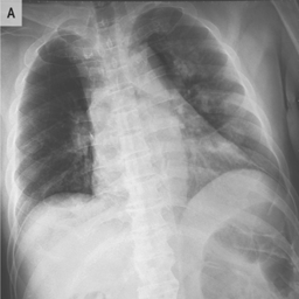

In [2]:
covid_image_path = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\COVID\COVID-2.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
covid_image

**Displaying one sample of NORMAL roentgen sample**

image dimensions: (299, 299)


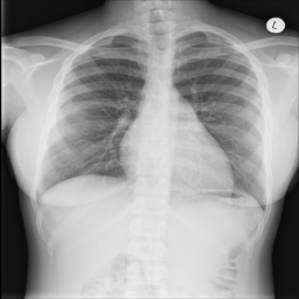

In [3]:
normal_image_path = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\Normal\Normal-2.png'
normal_image = Image.open(normal_image_path)
print("image dimensions:", normal_image.size)
normal_image

**Displaying one sample image of Lung Opacity**

image dimensions: (299, 299)


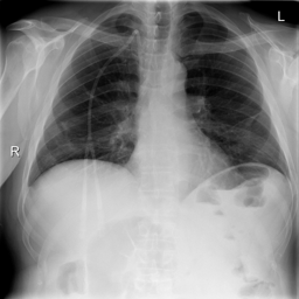

In [4]:
Lung_Opacity_image_path = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\Lung_Opacity\Lung_Opacity-96.png'
Lung_Opacity = Image.open(Lung_Opacity_image_path)
print("image dimensions:", Lung_Opacity.size)
Lung_Opacity

**Displaying one sample image of Viral Pneumonia**

image dimensions: (299, 299)


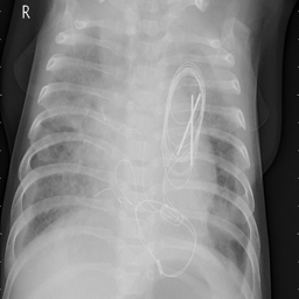

In [5]:
Viral_image_path = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\Viral Pneumonia\Viral Pneumonia-992.png'
Viral_Pneumonia = Image.open(Viral_image_path)
print("image dimensions:", Viral_Pneumonia.size)
Viral_Pneumonia

In [6]:
curr_dir = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\Viral Pneumonia'
cnt = 0
for file_name in os.listdir(curr_dir):
    file_path = os.path.join(curr_dir, file_name)
    covid_image = Image.open(file_path)
#     print(f"File name: {file_name}, Image mode: {covid_image.mode}")
    if covid_image.mode == 'RGB':
        covid_image.close()
        os.remove(file_path)
        cnt += 1
print(f'Number of RGB file in Viral Pneumonia: {cnt}')

Number of RGB file in Viral Pneumonia: 0


# Splitting

Initialize input folder and output folder for splitting

In [8]:
input_folder = r"C:\Users\harik\Downloads\COVID-19_Radiography_Dataset"
output = "roentgen"

In [9]:
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.6, 0.2, 0.2), group_prefix=None)

Copying files: 21025 files [00:41, 504.33 files/s] 


In [7]:
train_dir = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\roentgen\train'
val_dir = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\roentgen\val'
test_dir = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\roentgen\test'

Getting information about unique modes (bits that describe a color, like 'RGB', 'RGBA', 'Grayscale', etc) and unique image dimensions

Initialize image dimensions that I want to resize to

# Data Visualization

In [8]:
def get_data_labels(directory, shuffle=True, random_state=0):
    """
    Function used for going into the main training directory
    whose directory has sub-class-types.
    """
    from sklearn.utils import shuffle
    import os

    # Lists to store data and labels
    data_path = []
    data_labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)

        # Avoid MacOS storing path
        if not os.path.isdir(label_dir):
            
            continue

        # Going into each folder and getting image path
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)
            
    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)
            
    return data_path, data_labels

In [9]:
USER_PATH = r'C:\Users\harik\Downloads\COVID-19_Radiography_Dataset\roentgen'
train_paths, train_index = get_data_labels(USER_PATH + '/train', random_state=42)
val_paths, val_index = get_data_labels(USER_PATH + '/val', random_state=42)
test_paths, test_index = get_data_labels(USER_PATH + '/test', random_state=42)

class_mappings = {'COVID': 0, 'Normal': 1, 'Lung_Opacity': 2, 'Viral Pneumonia': 3}
inv_class_mappings = {v: k for k, v in class_mappings.items()}
class_names = list(class_mappings.keys())

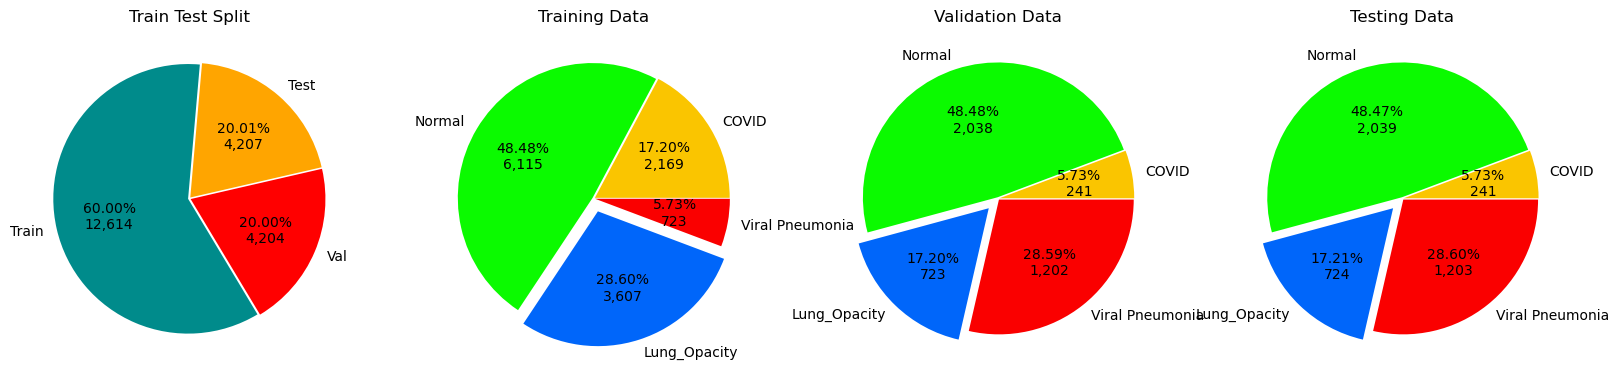

In [10]:
_, ax = plt.subplots(ncols=4, figsize=(20, 14))

# Plotting distribution of train val test split
ax[0].set_title('Train Test Split')
ax[0].pie(
    [len(train_index), len(val_index), len(test_index)],
    labels=['Train', 'Val', 'Test'],
    colors=['darkcyan', 'red', 'orange'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * 
                                                sum([len(train_index), len(val_index), len(test_index)]) / 100),
    explode=(0.01, 0.01, 0.01),
    startangle=85,
    textprops={'fontsize': 10}
)

# Plotting training data types
class_counts = [len([x for x in train_index if x == label]) for label in set(train_index)]
ax[1].set_title('Training Data')
ax[1].pie(
    class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
    textprops={'fontsize': 10}
)

# Plotting val data types
class_counts = [len([x for x in val_index if x == label]) for label in set(val_index)]
ax[2].set_title('Validation Data')
ax[2].pie(
    class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
    textprops={'fontsize': 10}
)

# Plotting testing data types
class_counts = [len([x for x in test_index if x == label]) for label in set(test_index)]
ax[3].set_title('Testing Data')
ax[3].pie(
    class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
    textprops={'fontsize': 10} 
)

plt.show()

Display the architecture of this simple CNN model.

In [11]:
from itertools import chain
from matplotlib import pyplot as plt
from PIL import Image

unique_dimensions = set()
unique_modes = set()

for subdir in chain(os.listdir(train_dir), os.listdir(test_dir), os.listdir(val_dir)):
    if subdir in os.listdir(train_dir):
        subdir_path = os.path.join(train_dir, subdir)
    elif subdir in os.listdir(test_dir):
        subdir_path = os.path.join(test_dir, subdir)
    else:
        subdir_path = os.path.join(val_dir, subdir)
        
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        try:
            image = Image.open(file_path)
            unique_dimensions.add(image.size[0])
            unique_dimensions.add(image.size[1])
            unique_modes.add(image.mode)
        except IOError:
            print(f"Cannot open file: {file_path}")

print("Unique modes:", unique_modes)
print("Unique dimensions:", unique_dimensions)

Unique modes: {'L'}
Unique dimensions: {299}


Getting image samples in certain unique color mode

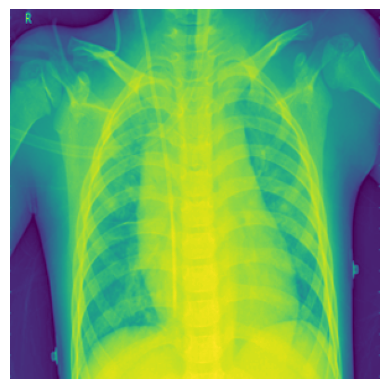

In [17]:
from itertools import chain
from matplotlib import pyplot as plt
from PIL import Image
import os


displayed_images = set()

# List subdirectories once to avoid redundant calls
train_subdirs = os.listdir(train_dir)
test_subdirs = os.listdir(test_dir)

for subdir in chain(train_subdirs, test_subdirs):
    subdir_path = os.path.join(train_dir, subdir) if subdir in train_subdirs else os.path.join(test_dir, subdir)
    
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        
        try:
            image = Image.open(file_path)
            if image.mode == "L" and file_path not in displayed_images:
                plt.axis("off")
                plt.imshow(image)
                #plt.show()  # Display the image
                displayed_images.add(file_path)
        except IOError:
            print(f"Cannot open file: {file_path}")


# Data Augmentation


This is done by making small changes to images in a dataset, such as flipping, resizing, cropping, adjusting brightness, or changing contrast.

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Create datagen for each train, validation, and testing images using ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1./255,  # Corrected rescale factor
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)  


BATCH_SIZE = 128
DIMENSIONS = (299, 299)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=DIMENSIONS,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=DIMENSIONS,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=DIMENSIONS,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 12614 images belonging to 4 classes.
Found 4204 images belonging to 4 classes.
Found 4207 images belonging to 4 classes.


Create the generators and resize to the dimension that I initialize earlier, with binary class_mode. We don't want to shuffle in test_generator, cause it will mess the comparation between true label and predicted label.

# Convolutional Neural Netowrk




### Initialization

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
from keras.optimizers import Adam

# CNN With 1 Convolutional Layer

### Create CNN Model

This CNN takes as input tensors of shape (image_height, image_width, image_channels). In this case, I configure the CNN to process inputs of size (256, 256, 3) from earlier DIMENSIONS variable declaration.

- The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map.

- The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters.

- To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the neurons.

- The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.

- I do a binary classification, using a final layer with 2 outputs and a sigmoid activation. Sigmoid activation enables me to calculate the output based on the threshold.

In [23]:
def onelayercnn(num_classes):
    backend.clear_session()
    cnn = Sequential()
    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(*DIMENSIONS, 3)))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Flatten())
    cnn.add(Dense(num_classes, activation='softmax'))
    cnn.summary()
    return cnn

Display the architecture of this simple CNN model.

In [28]:
num_classes = 4
cnn_one_layer = onelayercnn(num_classes)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 700928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │     2,803,716 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,804,612 (10.70 MB)

 Trainable params: 2,804,612 (10.70 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
cnn_one_layer = onelayercnn(num_classes)
cnn_one_layer.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 700928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │     2,803,716 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,804,612 (10.70 MB)

 Trainable params: 2,804,612 (10.70 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
EPOCHS = 10
history = cnn_one_layer.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/10


C:\Users\harik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.4134 - loss: 11.6656 - val_accuracy: 0.6030 - val_loss: 0.9798
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.5588 - loss: 1.0313 - val_accuracy: 0.5956 - val_loss: 0.9898
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.5768 - loss: 0.9777 - val_accuracy: 0.5887 - val_loss: 1.0206
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.5713 - loss: 0.9905 - val_accuracy: 0.6075 - val_loss: 1.0066
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.5954 - loss: 0.9564 - val_accuracy: 0.6106 - val_loss: 0.9875
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.6001 - loss: 0.9354 - val_accuracy: 0.6199 - val_loss: 0.9529
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.6024 - loss: 0.9225 - val_accuracy: 0.6037 - val_loss: 1.0031
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - accuracy: 0.6029 - loss: 0.9294 - val_accuracy: 0.6292 - val_loss: 0

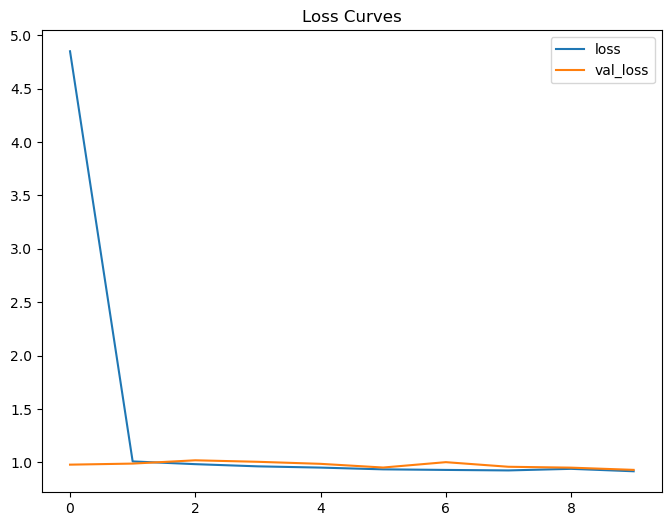

In [31]:
plt.figure(figsize=(8,6))
plt.title("Loss Curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

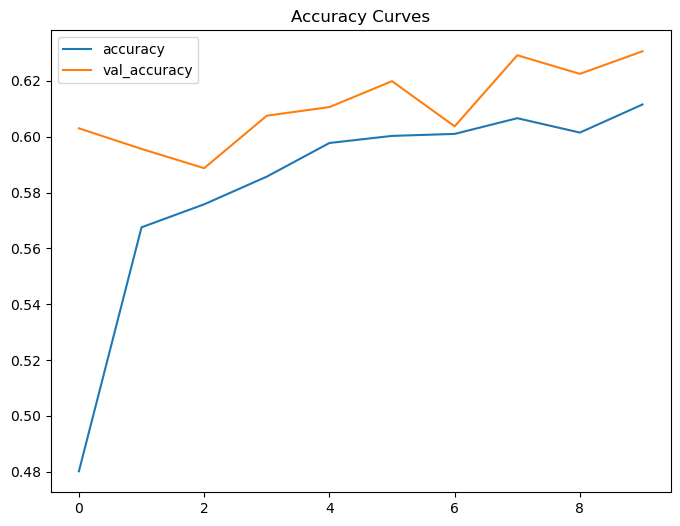

In [32]:
plt.figure(figsize=(8,6))
plt.title("Accuracy Curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

# Classification Report


I can summarize the performance of my classifier as follows:

In [39]:
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = cnn_one_layer.predict(test_generator, verbose=1)
y_preds = np.round(y_pred).flatten()  

print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)
print("Type of y_true:", type(y_true))
print("Type of y_pred:", type(y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 573ms/step
Shape of y_true: (4207,)
Shape of y_pred: (4207, 4)
Type of y_true: <class 'numpy.ndarray'>
Type of y_pred: <class 'numpy.ndarray'>


In [40]:
y_preds = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Get true labels
y_true = test_generator.labels

# Print classification report
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.17      0.03      0.05       724
           1       0.29      0.32      0.31      1203
           2       0.49      0.61      0.55      2039
           3       0.05      0.05      0.05       241

    accuracy                           0.40      4207
   macro avg       0.25      0.25      0.24      4207
weighted avg       0.36      0.40      0.36      4207



In [41]:
incorrect_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]
correct_indices = np.where(y_true.reshape(-1,1) == y_pred)[0]

Here's the subset of correctly predicted classes.

C:\Users\harik\AppData\Local\Temp\ipykernel_25712\4090170526.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


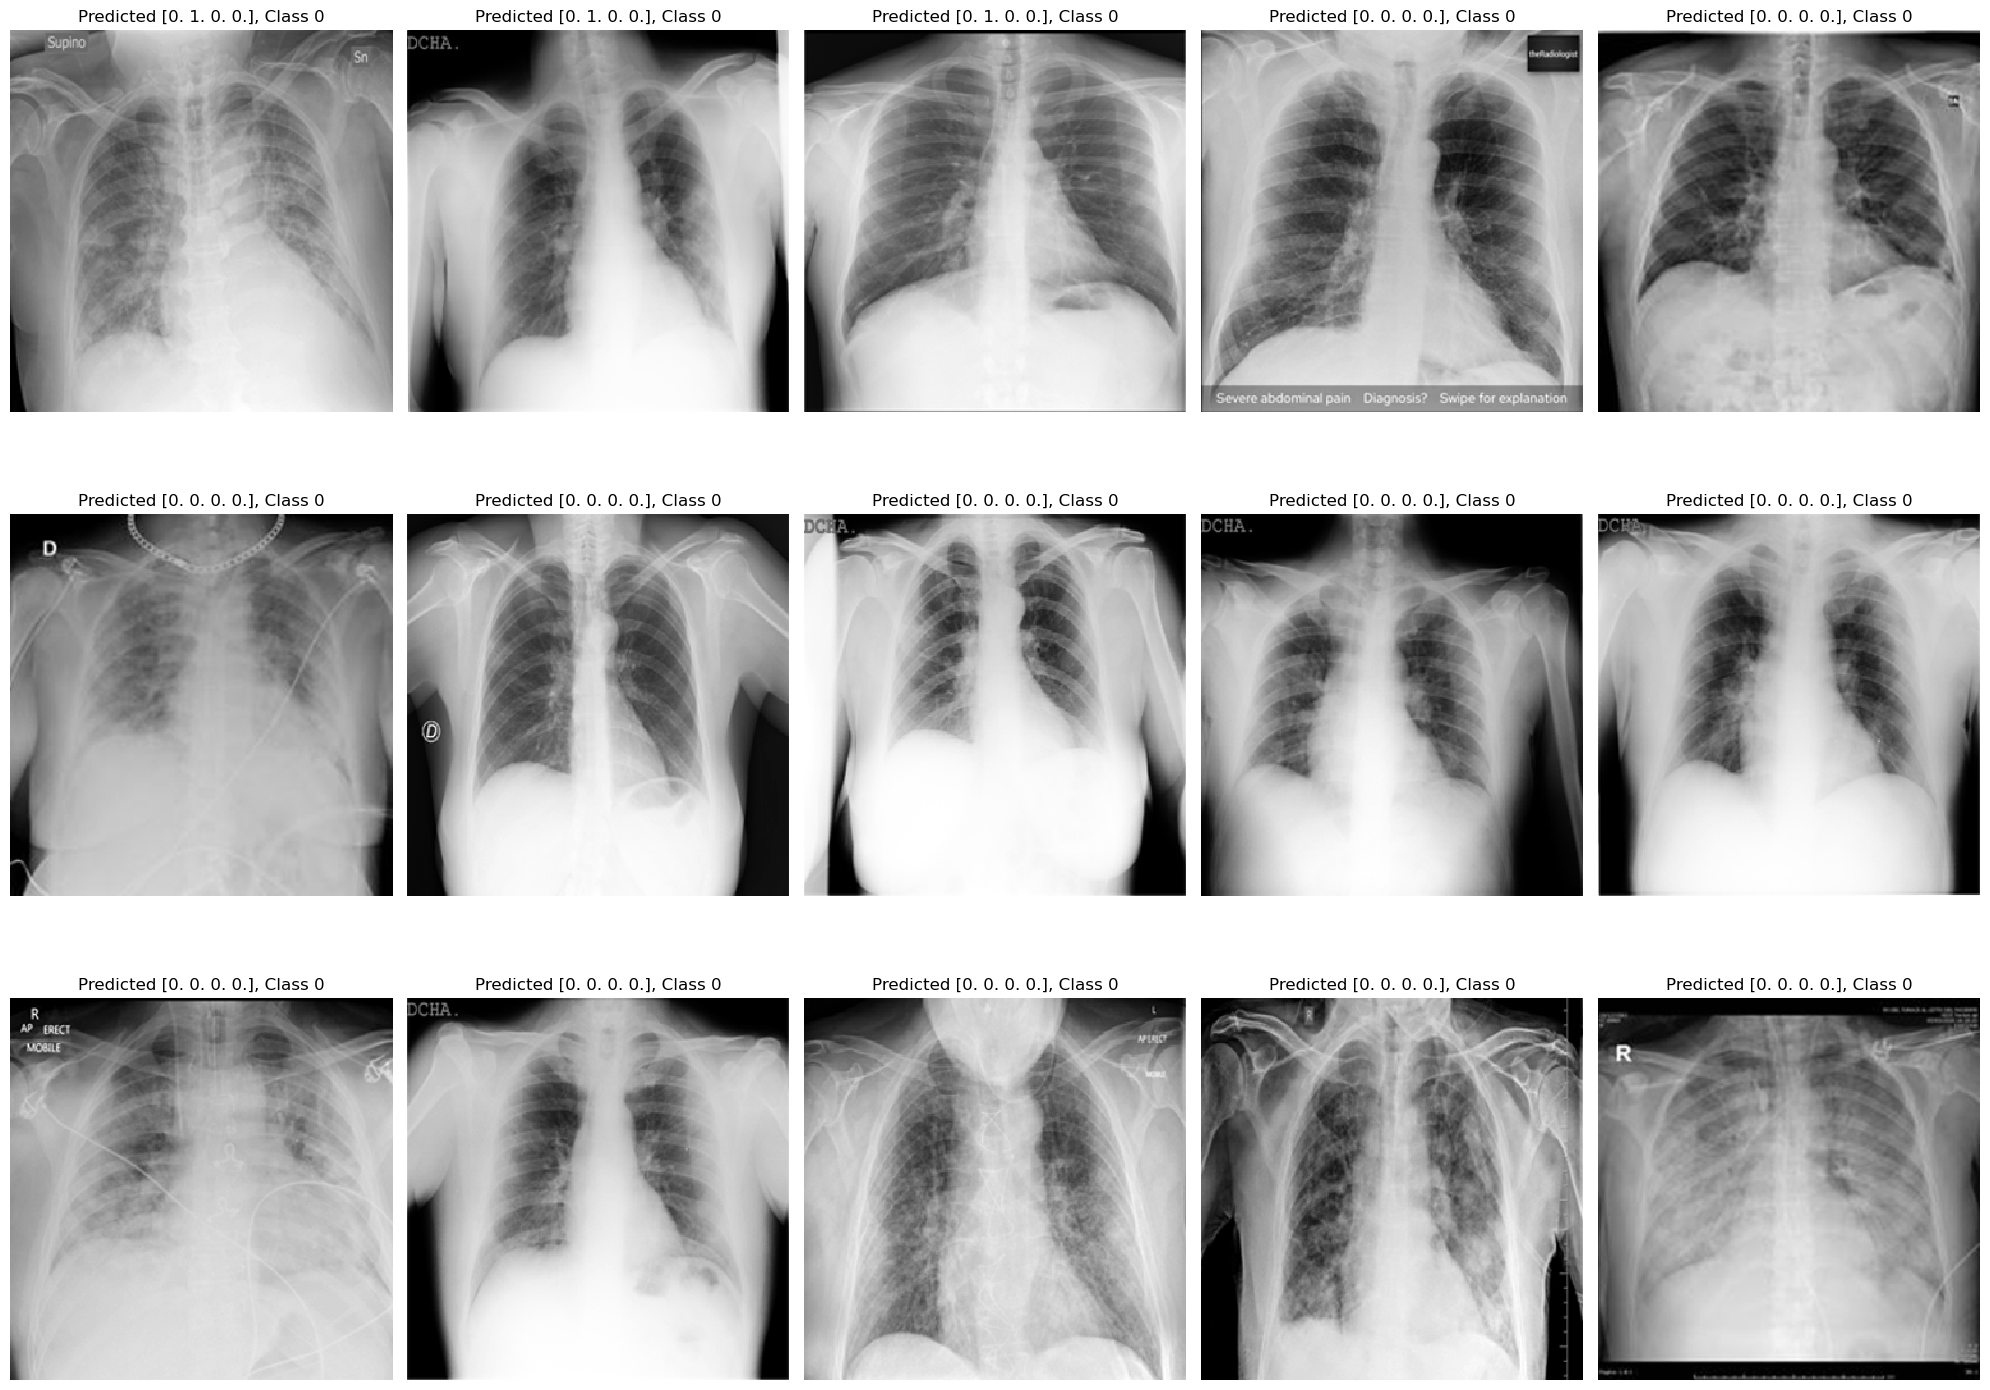

In [42]:
plt.figure(figsize=(20, 20))
for i, correct in enumerate(correct_indices[:15]):
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_true[correct]))
    plt.axis("off")
    plt.tight_layout()

And here's the subset of incorrectly predicted classes.

C:\Users\harik\AppData\Local\Temp\ipykernel_25712\2805801033.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


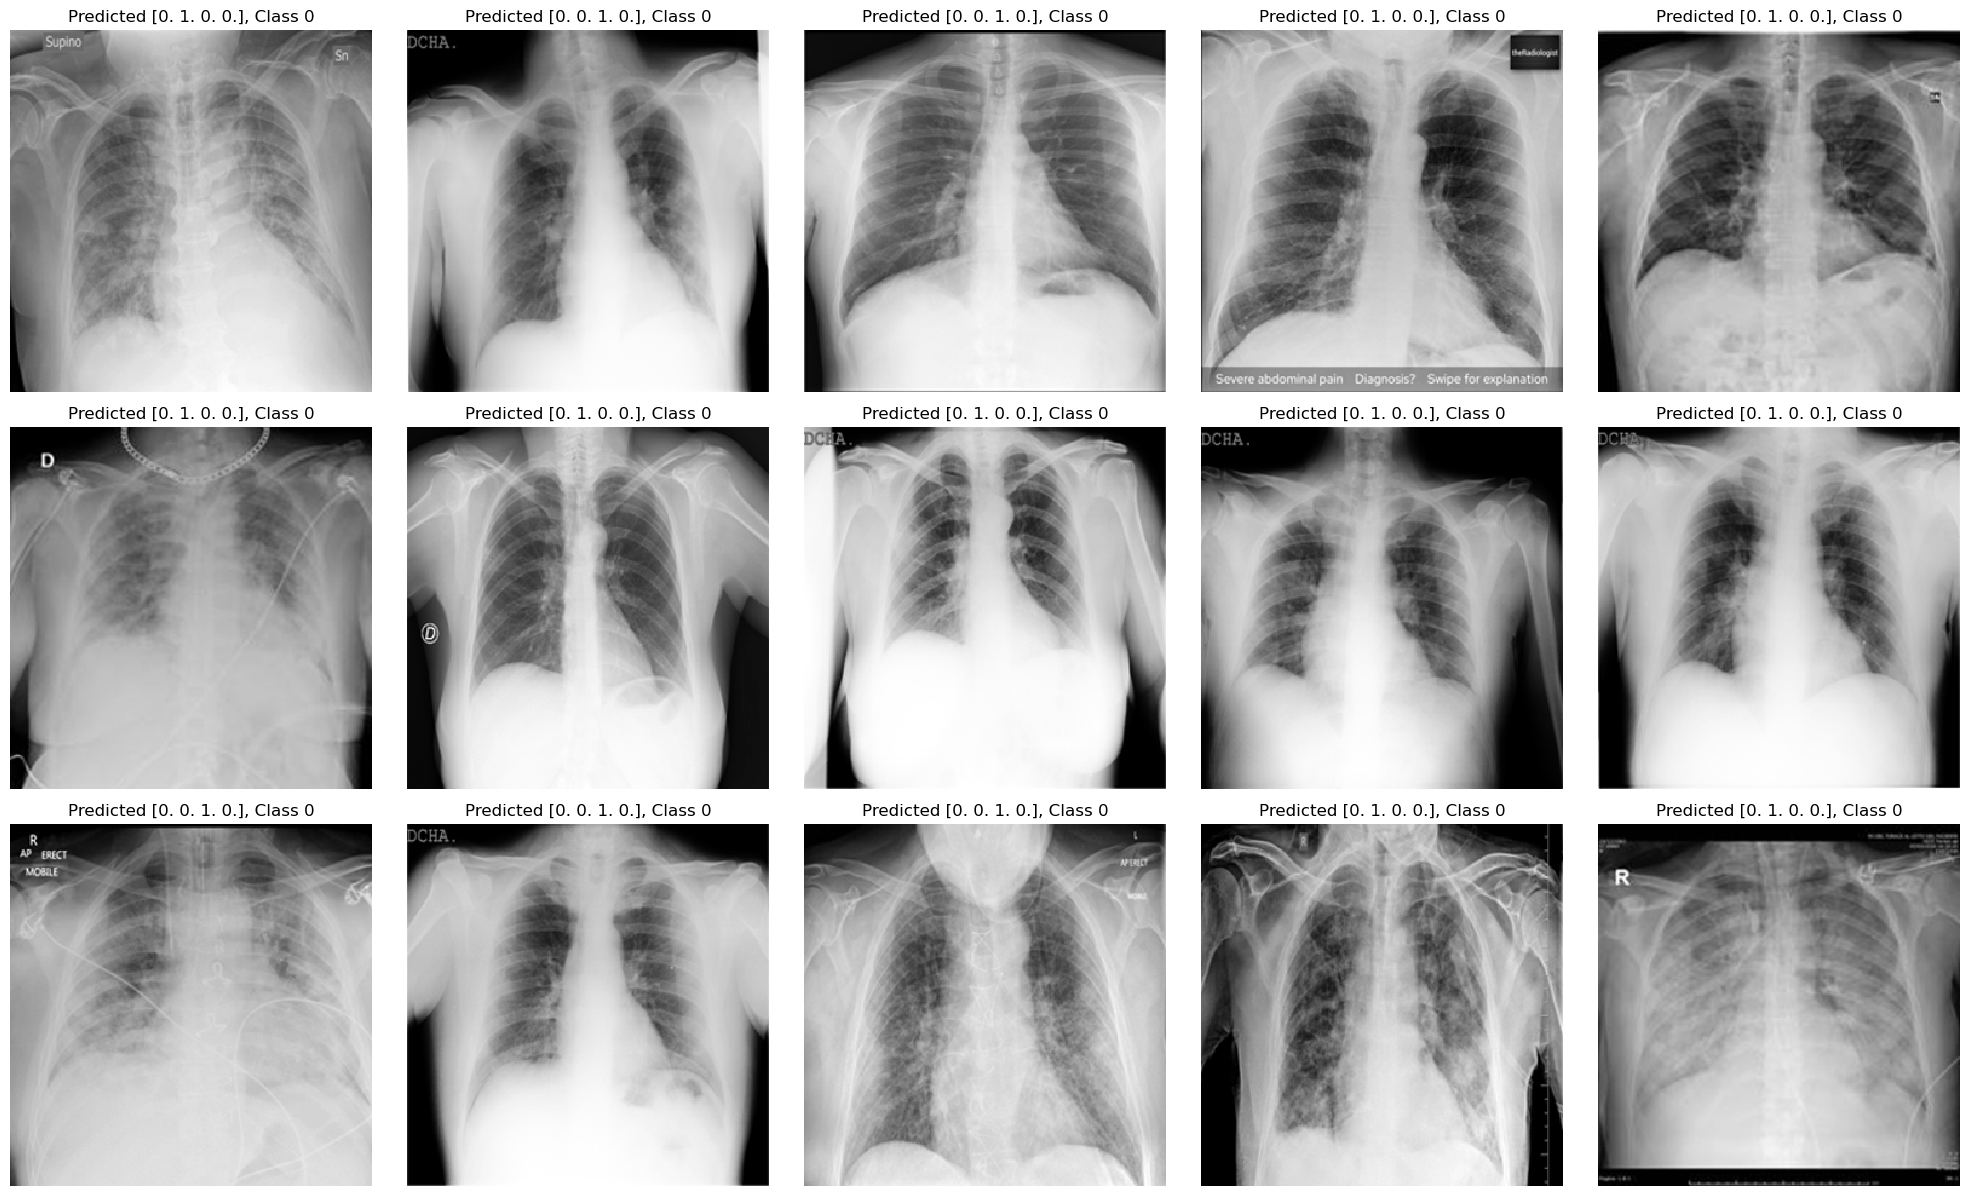

In [43]:
plt.figure(figsize=(20, 20))
for i, incorrect in enumerate(incorrect_indices[:15]):
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_true[incorrect]))
    plt.axis("off")
    plt.tight_layout()

# Confusion Matrix

Let's plot the confusion matrix.

Shape of y_true: (4207,)
Shape of y_pred_indices: (4207,)
Type of y_true: <class 'numpy.ndarray'>
Type of y_pred_indices: <class 'numpy.ndarray'>


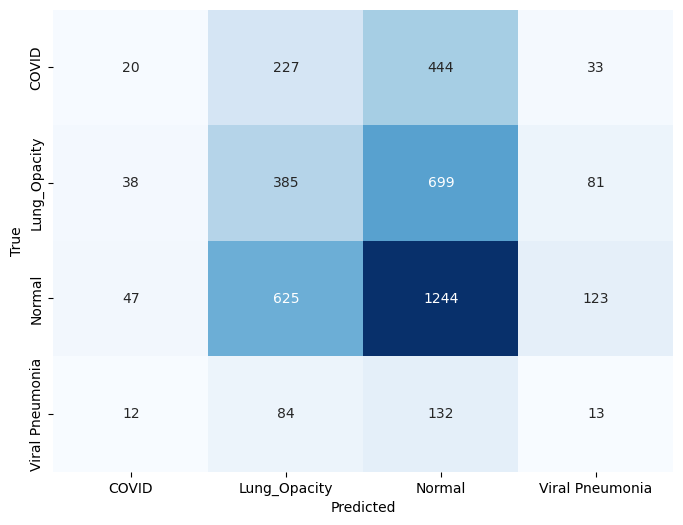

In [49]:
y_pred_indices = np.argmax(y_pred_probs, axis=1)

# Print the shapes and types to ensure they match
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred_indices:", y_pred_indices.shape)
print("Type of y_true:", type(y_true))
print("Type of y_pred_indices:", type(y_pred_indices))

# Now, compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_indices)

unique_labels = test_generator.class_indices
class_names = list(unique_labels.keys())

# Plot the confusion matrix with class names as labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            annot_kws={"size": 10},
            fmt='g',
            cbar=False,
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# CNN Model with 3 Layers

In [50]:
def threelayercnn():
    backend.clear_session()
    cnn = Sequential()
    
    # First convolutional layer
    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(*DIMENSIONS, 3)))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.2))
    
    # Second convolutional layer
    cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.2))
    
    # Third convolutional layer
    cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.2))
    
    # Fully connected layer
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dropout(0.5))
    
    # Output layer
    cnn.add(Dense(4, activation='softmax'))
    
    cnn.summary()
    return cnn


In [51]:
# Create and compile the model
cnn_three_layer = threelayercnn()
cnn_three_layer.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\harik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 156800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    20,070,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,164,292 (76.92 MB)

 Trainable params: 20,164,292 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model
EPOCHS = 10
history = cnn_three_layer.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1068s 10s/step - accuracy: 0.4234 - loss: 2.3664 - val_accuracy: 0.4888 - val_loss: 1.1902
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1086s 10s/step - accuracy: 0.4987 - loss: 1.1537 - val_accuracy: 0.5680 - val_loss: 1.0431
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1029s 10s/step - accuracy: 0.5350 - loss: 1.0756 - val_accuracy: 0.6149 - val_loss: 0.9656
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1003s 10s/step - accuracy: 0.5524 - loss: 1.0512 - val_accuracy: 0.5771 - val_loss: 0.9912
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 999s 10s/step - accuracy: 0.5788 - loss: 0.9951 - val_accuracy: 0.6075 - val_loss: 0.9304
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 995s 10s/step - accuracy: 0.6019 - loss: 0.9540 - val_accuracy: 0.5944 - val_loss: 0.9371
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 993s 10s/step - accuracy: 0.6106 - loss: 0.9249 - val_accuracy: 0.5875 - val_loss: 0.9416
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 997s 10s/step - accuracy: 0.6130 - loss: 0.9031 - val_accuracy

In [ ]:
# Evaluate the model
test_loss, test_accuracy = cnn_three_layer.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

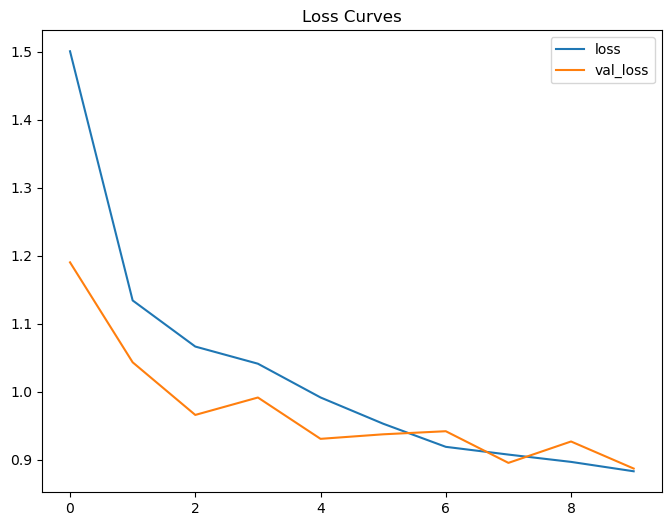

In [53]:
plt.figure(figsize=(8,6))
plt.title("Loss Curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

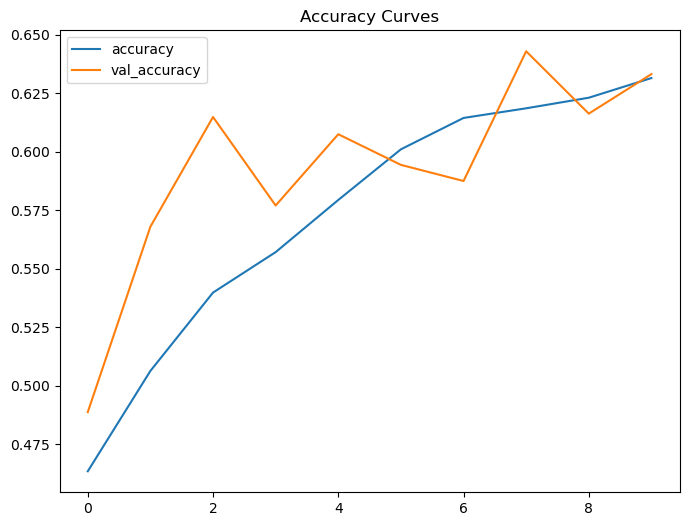

In [54]:
plt.figure(figsize=(8,6))
plt.title("Accuracy Curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [55]:
y_pred_probs = cnn_one_layer.predict(test_generator, verbose=1)
y_preds = np.round(y_pred).flatten()  

print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)
print("Type of y_true:", type(y_true))
print("Type of y_pred:", type(y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 660ms/step
Shape of y_true: (4207,)
Shape of y_pred: (4207, 4)
Type of y_true: <class 'numpy.ndarray'>
Type of y_pred: <class 'numpy.ndarray'>


In [57]:
incorrect_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]
correct_indices = np.where(y_true.reshape(-1,1) == y_pred)[0]

C:\Users\harik\AppData\Local\Temp\ipykernel_25712\4090170526.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


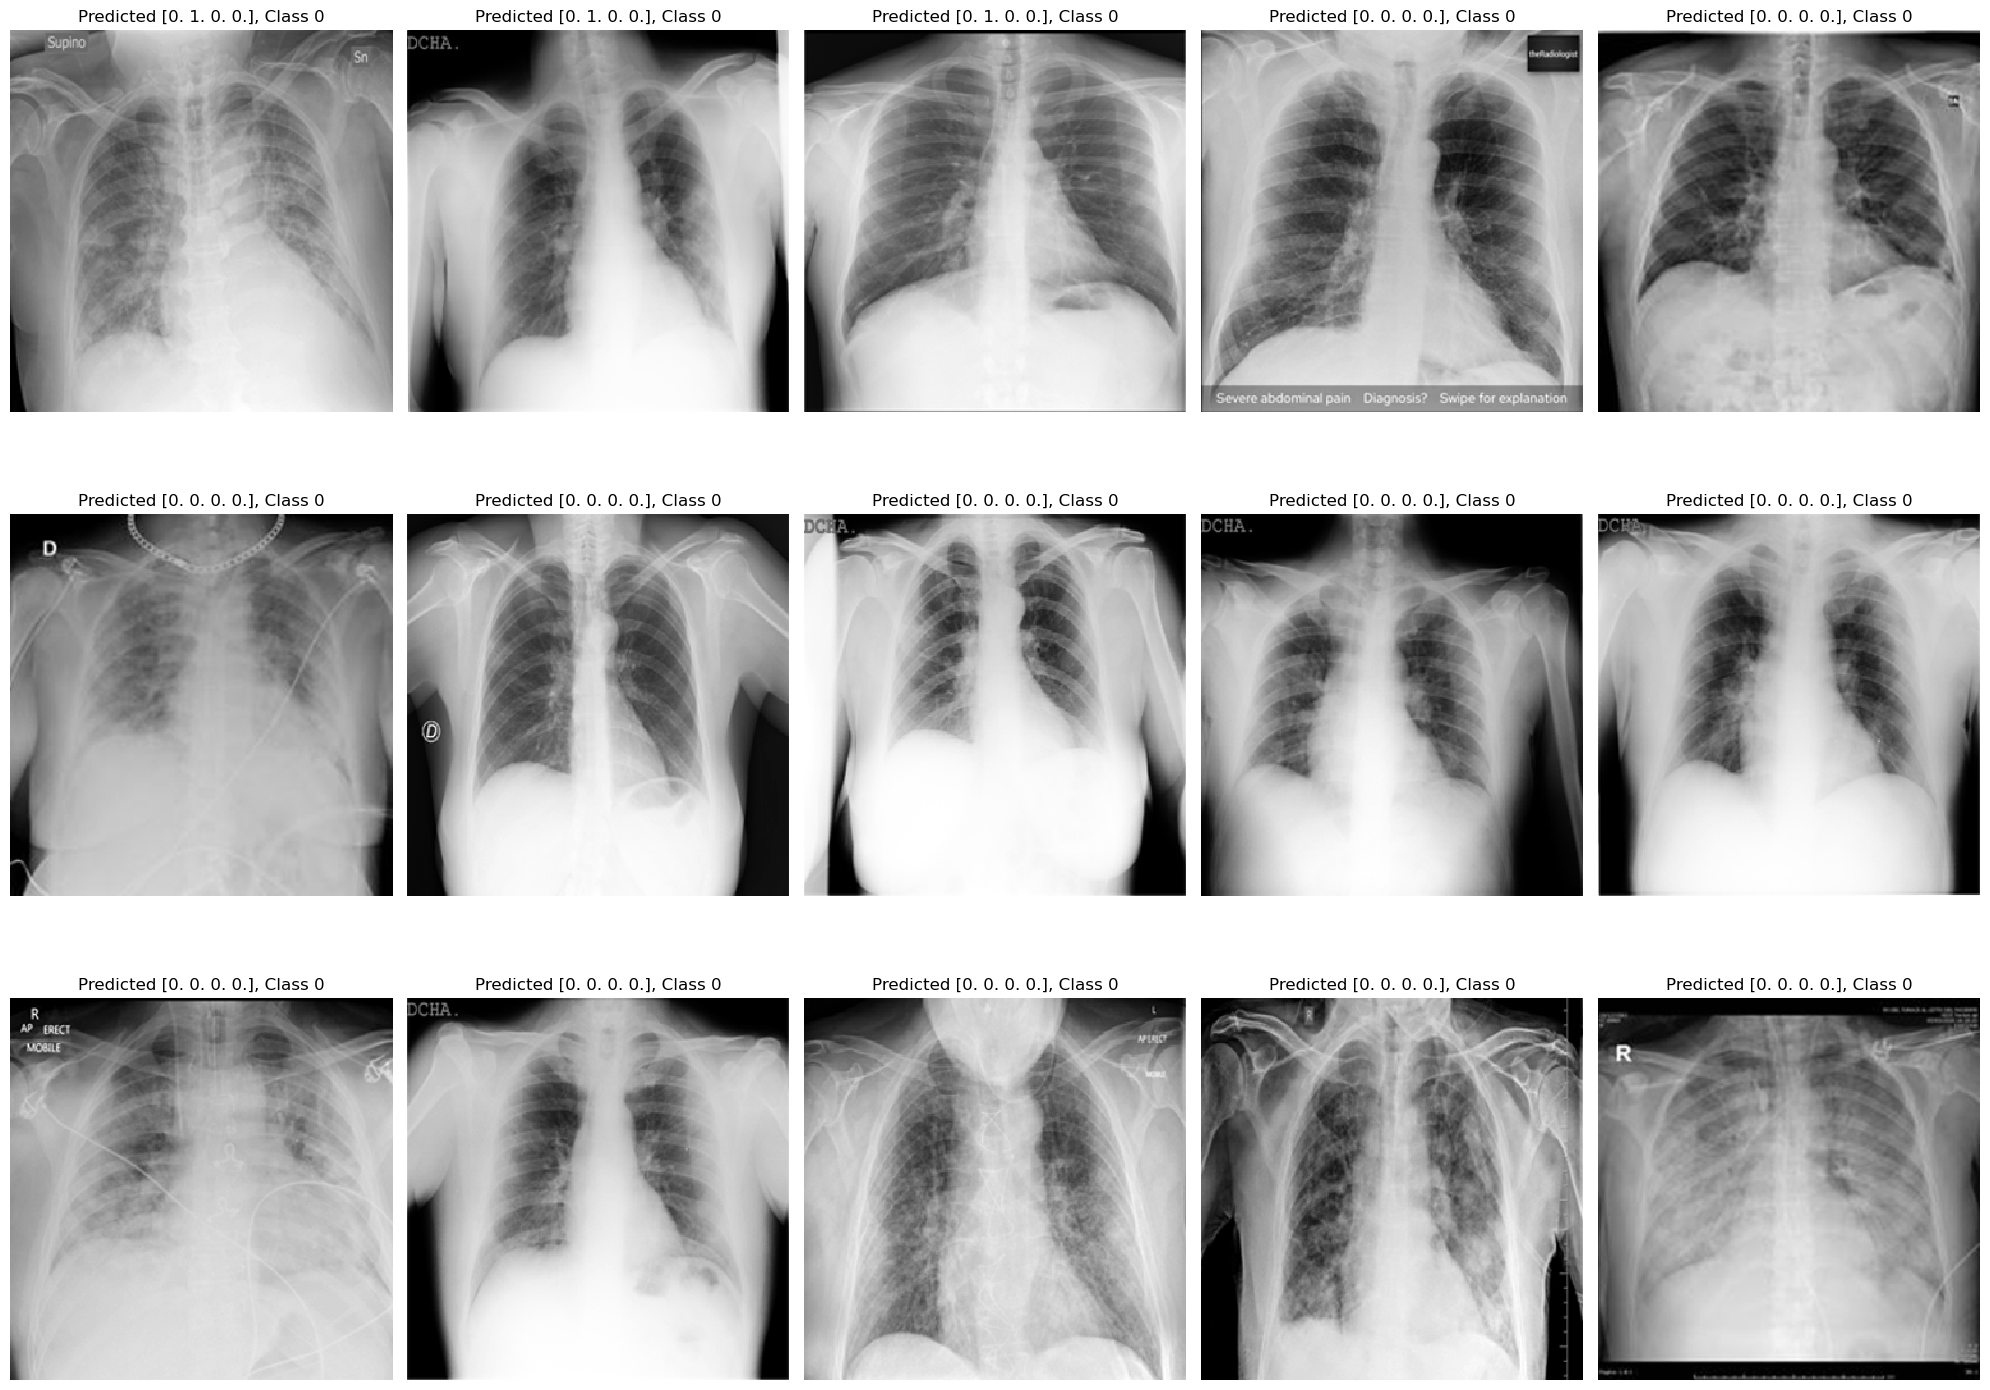

In [58]:
plt.figure(figsize=(20, 20))
for i, correct in enumerate(correct_indices[:15]):
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_true[correct]))
    plt.axis("off")
    plt.tight_layout()

C:\Users\harik\AppData\Local\Temp\ipykernel_25712\2805801033.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


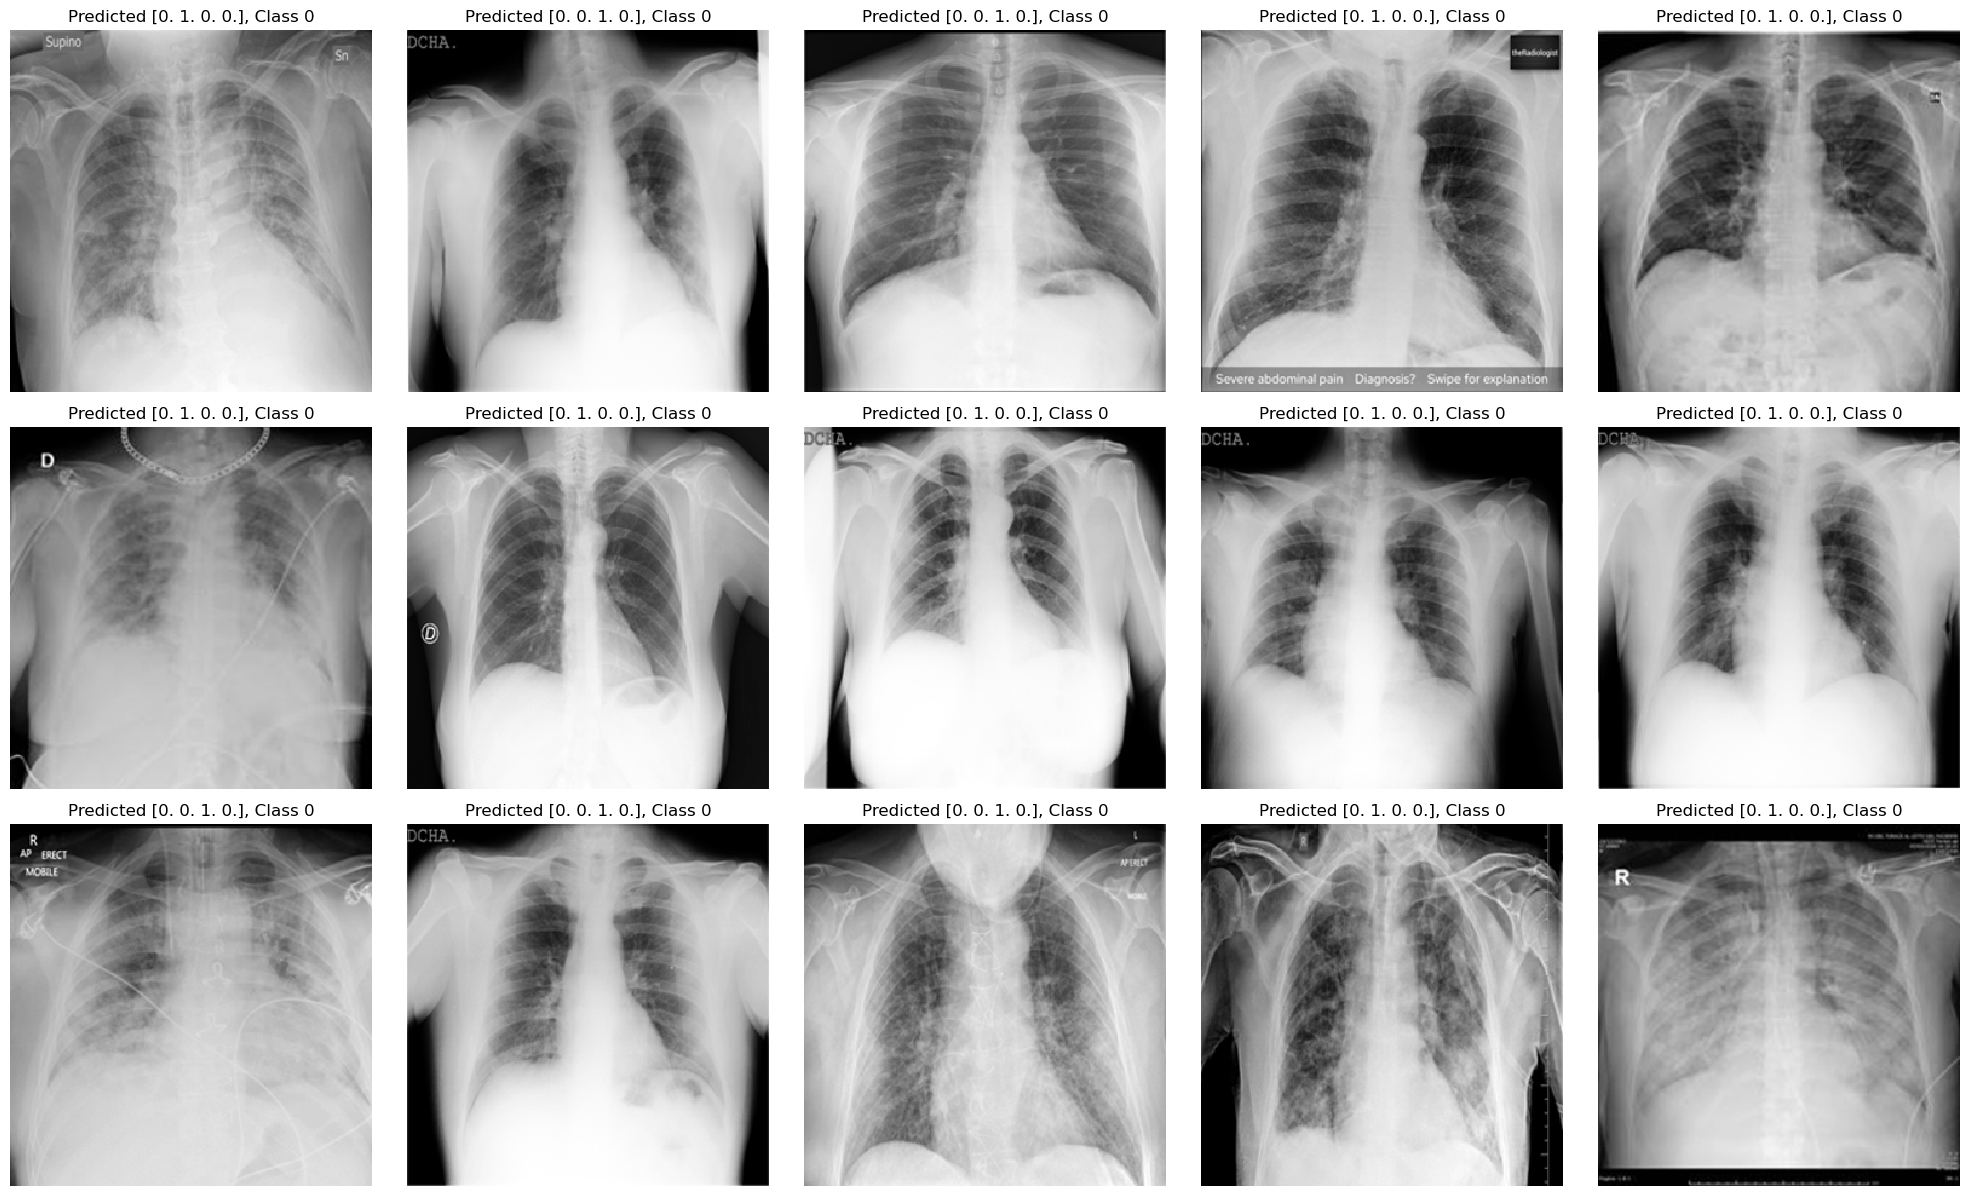

In [59]:
plt.figure(figsize=(20, 20))
for i, incorrect in enumerate(incorrect_indices[:15]):
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_true[incorrect]))
    plt.axis("off")
    plt.tight_layout()

Shape of y_true: (4207,)
Shape of y_pred_indices: (4207,)
Type of y_true: <class 'numpy.ndarray'>
Type of y_pred_indices: <class 'numpy.ndarray'>


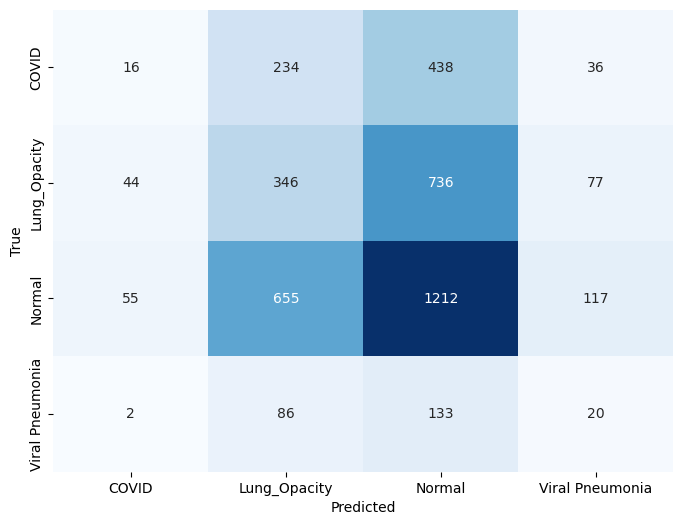

In [60]:
y_pred_indices = np.argmax(y_pred_probs, axis=1)

# Print the shapes and types to ensure they match
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred_indices:", y_pred_indices.shape)
print("Type of y_true:", type(y_true))
print("Type of y_pred_indices:", type(y_pred_indices))

# Now, compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_indices)

unique_labels = test_generator.class_indices
class_names = list(unique_labels.keys())

# Plot the confusion matrix with class names as labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            annot_kws={"size": 10},
            fmt='g',
            cbar=False,
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Conclusion

In this project, we developed a Convolutional Neural Network (CNN) to detect COVID-19 from chest X-ray images using the Keras deep learning library. We explored models with 1 and 3 convolutional layers and employed data augmentation techniques to enhance the training dataset's variability.

Our approach involved splitting the dataset into 60% training, 20% validation, and 20% testing subsets to ensure the model's robustness and to evaluate its performance on unseen data. We trained the models for 10 epochs with a batch size of 128, using the binary_crossentropy loss function and the Adam optimizer.

The results indicated that both models were able to learn and distinguish between COVID-19 and non-COVID-19 X-ray images, with the 3-layer CNN showing improved performance due to its deeper architecture. However, careful monitoring of training and validation accuracies was crucial to avoid overfitting.

By implementing this approach, we demonstrated that deep learning models, particularly CNNs, can be effectively used for COVID-19 detection from chest X-ray images. This model can potentially assist healthcare professionals in diagnosing COVID-19, contributing to faster and more accurate medical assessments.

Further improvements could include experimenting with different architectures, fine-tuning hyperparameters, and incorporating more diverse datasets to enhance the model's generalizability and accuracy.